# **Estudo Observacional do Desempenho de Estudantes de Escolas Públicas no ENEM de 2023**

Importando bibliotecas necessárias:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import t
from scipy.stats import norm

# Definições de cores -> todas estão numa escala de mais escura para mais clara.
VERMELHO_FORTE = '#461220'
CINZA1, CINZA2, CINZA3 = '#231F20', '#414040', '#555655'
CINZA4, CINZA5, CINZA6 = '#646369', '#76787B', '#828282'
CINZA7, CINZA8, CINZA9 = '#929497', '#A6A6A5', '#BFBEBE'
AZUL1, AZUL2, AZUL3, AZUL4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
VERMELHO1, VERMELHO2, VERMELHO3, VERMELHO4, VERMELHO5 = '#DB0527', '#E23652', '#ED8293', '#F4B4BE', '#FBE6E9'
VERDE1, VERDE2 = '#0C8040', '#9ABB59'
LARANJA1 = '#F79747'
AMARELO1, AMARELO2, AMARELO3, AMARELO4, AMARELO5 = '#FFC700', '#FFCC19', '#FFEB51', '#FFE37F', '#FFEEB2'
BRANCO = '#FFFFFF'

# Carregando os Dados

In [ ]:
df = pd.read_csv("/content/MICRODADOS_ENEM_2023.csv", sep=';', encoding='ISO-8859-1')
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210059085136,2023,14,M,2,1,1,1,17,1,...,C,C,B,B,A,B,B,A,A,B
1,210059527735,2023,12,M,2,1,0,1,16,1,...,B,A,B,B,A,A,C,A,D,B
2,210061103945,2023,6,F,1,1,1,1,0,1,...,B,A,A,B,A,A,A,A,A,B
3,210060214087,2023,2,F,1,3,1,2,0,2,...,A,A,A,B,A,A,D,A,A,B
4,210059980948,2023,3,F,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,A


In [ ]:
len(df)

157635

# Limpeza e Preparação dos Dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54632 entries, 0 to 54631
Data columns (total 76 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NU_INSCRICAO            54632 non-null  int64  
 1   NU_ANO                  54632 non-null  int64  
 2   TP_FAIXA_ETARIA         54632 non-null  int64  
 3   TP_SEXO                 54632 non-null  object 
 4   TP_ESTADO_CIVIL         54632 non-null  int64  
 5   TP_COR_RACA             54632 non-null  int64  
 6   TP_NACIONALIDADE        54632 non-null  int64  
 7   TP_ST_CONCLUSAO         54632 non-null  int64  
 8   TP_ANO_CONCLUIU         54632 non-null  int64  
 9   TP_ESCOLA               54632 non-null  int64  
 10  TP_ENSINO               19410 non-null  float64
 11  IN_TREINEIRO            54632 non-null  int64  
 12  CO_MUNICIPIO_ESC        11890 non-null  float64
 13  NO_MUNICIPIO_ESC        11890 non-null  object 
 14  CO_UF_ESC               11890 non-null

Os dados possuem 179885 linhas e 76 colunas.

Para acessar o significado de cada coluna, consultar o Dicionário de Microdados do ENEM 2023. Colunas:

In [ ]:
df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [ ]:
# checando para dados nulos
df.isnull().any()

NU_INSCRICAO       False
NU_ANO             False
TP_FAIXA_ETARIA    False
TP_SEXO            False
TP_ESTADO_CIVIL    False
                   ...  
Q021                True
Q022                True
Q023                True
Q024                True
Q025                True
Length: 76, dtype: bool

In [ ]:
df.duplicated().sum()

0

Identidicada a presença de dados nulos, mas não há dados duplicados.

In [ ]:
df['NU_INSCRICAO'].isnull().sum()

0

In [ ]:
df['NU_INSCRICAO'].duplicated().sum()

0

No entanto, a variável número de inscrição não possui dados nulos ou duplicados.

## Selecionando as colunas de interesse:
Por se tratar de uma base de dados extensa, iremos selecionar apenas as colunas de interesse para este trabalho para facilitar a manipulação da base de dados.
Nesta etapa, serão eliminadas as colunas com informações sobre código diversos, vetores de respostas, notas de cada competência da redação, e algumas perguntas do questionário socioeconômico que não serão exploradas neste trabalho.

In [ ]:
df.drop(['TP_ESTADO_CIVIL','TP_ENSINO','CO_MUNICIPIO_ESC','CO_UF_PROVA','CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT','TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2',
        'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
        'Q003', 'Q004','Q005', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
       'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023'], axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54632 entries, 0 to 54631
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NU_INSCRICAO            54632 non-null  int64  
 1   NU_ANO                  54632 non-null  int64  
 2   TP_FAIXA_ETARIA         54632 non-null  int64  
 3   TP_SEXO                 54632 non-null  object 
 4   TP_COR_RACA             54632 non-null  int64  
 5   TP_NACIONALIDADE        54632 non-null  int64  
 6   TP_ST_CONCLUSAO         54632 non-null  int64  
 7   TP_ANO_CONCLUIU         54632 non-null  int64  
 8   TP_ESCOLA               54632 non-null  int64  
 9   IN_TREINEIRO            54632 non-null  int64  
 10  NO_MUNICIPIO_ESC        11890 non-null  object 
 11  CO_UF_ESC               11890 non-null  float64
 12  SG_UF_ESC               11890 non-null  object 
 13  TP_DEPENDENCIA_ADM_ESC  11890 non-null  float64
 14  TP_LOCALIZACAO_ESC      11890 non-null

Investigando as colunas com dados nulos

In [ ]:
null_df = (df.isna().sum() / len(df) * 100).to_frame().rename(columns={0: 'nulos_pct'})
null_df['num_nulos'] = df.isna().sum()
null_df.sort_values(by=['nulos_pct'], ascending=False)

,nulos_pct,num_nulos
NO_MUNICIPIO_ESC,78.236199,42742
SG_UF_ESC,78.236199,42742
TP_SIT_FUNC_ESC,78.236199,42742
TP_LOCALIZACAO_ESC,78.236199,42742
TP_DEPENDENCIA_ADM_ESC,78.236199,42742
CO_UF_ESC,78.236199,42742
NU_NOTA_CN,24.491141,13380
NU_NOTA_MT,24.491141,13380
NU_NOTA_REDACAO,21.655806,11831
TP_STATUS_REDACAO,21.655806,11831


# Selecionando uma amostra de indivíduos por uma AASs

In [ ]:
df = df.loc[(df['TP_PRESENCA_CN'] == 1 ) |
  (df['TP_PRESENCA_CH'] == 1 ) | (df['TP_STATUS_REDACAO'] == 1 ) | (df['TP_PRESENCA_LC'] == 1 )| (df['TP_PRESENCA_MT'] == 1 )]

In [ ]:

# Create average grade variable.
df['nota_media'] = (df['NU_NOTA_LC'] + \
                    df['NU_NOTA_CH'] + \
                    df['NU_NOTA_CN'] + \
                    df['NU_NOTA_MT'] + \
                    df['NU_NOTA_REDACAO']) / 5

<ipython-input-75-dca56b6c1c29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nota_media'] = (df['NU_NOTA_LC'] + \


In [ ]:
# selecionando apenas as escolas públicas
df_pub = df.loc[df['TP_ESCOLA'] == 2]
# df_priv = df.loc[df['TP_ESCOLA'] == 3]

In [ ]:
np.random.seed(123)

# Coletando amostra piloto

piloto_pub = df_pub.sample(n=10, replace=False)
# piloto_priv = df_priv.sample(n=10, replace=False)

var_pub = np.var(piloto_pub['NU_NOTA_REDACAO'])*len(piloto_pub) / (len(piloto_pub)-1)
# var_priv = np.var(piloto_priv['NU_NOTA_REDACAO'])*len(piloto_priv) / (len(piloto_priv)-1)

# Calculando o tamanho da amostra em ambos os casos com um erro máximo de 50 pontos e 95% de confiança

size_pub = 1 / ((100 / ((1.96*np.sqrt(var_pub)))**2 + 1 / len(df_pub)))
# size_priv = 1 / ((50 / ((1.96*np.sqrt(var_priv)))**2 + 1 / len(df_priv)))

print('O tamanho amostral para os alunos de escola pública é de: ', np.round(size_pub) + 1)
# print('O tamanho amostral para os alunos de escola privada é de: ', np.round(size_priv) + 1)

O tamanho amostral para os alunos de escola pública é de:  602.0


In [ ]:
np.random.seed(123)

amostra_pub = df_pub.sample(n= 2125, replace=False)
# amostra_priv = df_priv.sample(n=1046, replace=False)
amostra_pub

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,...,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,nota_media
6939,210058314221,2023,3,F,1,1,2,0,2,0,...,436.8,NaN,1.0,620.0,E,F,E,B,B,NaN
26888,210060131878,2023,3,F,3,1,2,0,2,0,...,428.9,370.4,1.0,600.0,B,E,C,B,B,482.60
839,210061244828,2023,2,F,3,1,2,0,2,0,...,542.1,382.6,1.0,680.0,B,F,C,A,A,535.16
49938,210061135068,2023,3,F,3,1,2,0,2,0,...,526.1,695.3,1.0,740.0,E,E,D,B,B,615.08
40407,210059925906,2023,3,F,1,1,2,0,2,0,...,533.1,427.1,1.0,840.0,H,B,B,A,B,551.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38636,210060022373,2023,2,F,1,1,2,0,2,0,...,634.8,738.9,1.0,880.0,E,E,C,B,B,701.86
17130,210059933374,2023,4,F,4,3,2,0,2,0,...,387.7,414.1,1.0,380.0,H,H,C,B,B,407.18
22552,210059913002,2023,2,M,3,1,2,0,2,0,...,525.2,499.7,1.0,640.0,D,E,E,B,B,514.52
26146,210059329569,2023,1,F,3,1,2,0,2,0,...,617.6,624.2,1.0,860.0,E,H,B,A,B,620.98


In [ ]:
len(df_pub)

16170

# Visualização de dados

## Coletando uma amostra piloto para estimar a variabiliadade das notas de alunos de escolas públicas

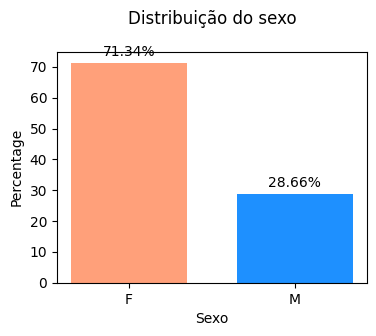

In [ ]:
# Grouping the data by sex
sex_grouped = amostra_pub.groupby(['TP_SEXO'])[['TP_SEXO']].count().rename(columns={'TP_SEXO': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
sex_grouped['pct'] = round(sex_grouped['count'] / np.sum(sex_grouped['count']) * 100, 2)

# Bar plot using matplotlib
def bar_plot(data, x_col, y_col, title, xlabel, ylabel='Percentage', figsize=(4, 3), title_pad=20, barwidth=0.7, bar_color=['#FFA07A', '#1E90FF'], invert_xaxis=False):
    fig, ax = plt.subplots(figsize=figsize)

    # Creating the bar plot
    bars = ax.bar(data[x_col], data[y_col], width=barwidth, color=bar_color)

    # Adding the labels and title
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title, pad=title_pad)

    # Inverting x-axis if required
    if invert_xaxis:
        ax.invert_xaxis()

    # Adding the percentage values on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    plt.show()

# Calling the bar_plot function
bar_plot(sex_grouped, 'TP_SEXO', 'pct', 'Distribuição do sexo', 'Sexo',
         figsize=(4, 3), title_pad=20, barwidth=0.7,
         bar_color=['#FFA07A', '#1E90FF'], invert_xaxis=False)

## Histogramas das notas da amostra selecionada por área

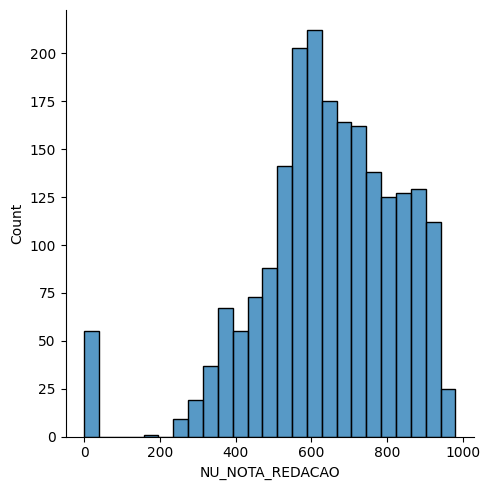

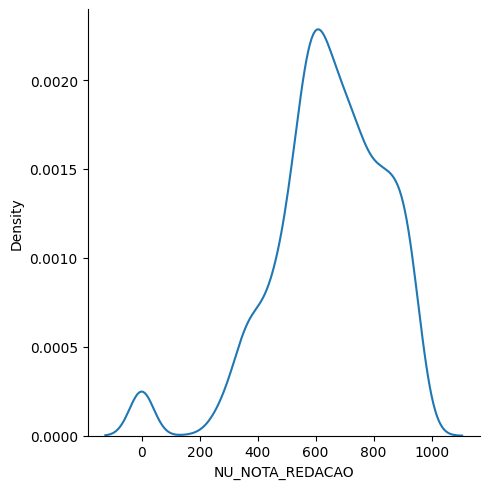

In [ ]:


sns.displot(amostra_pub['NU_NOTA_REDACAO'], bins=25)
sns.displot(amostra_pub['NU_NOTA_REDACAO'], kind='kde')

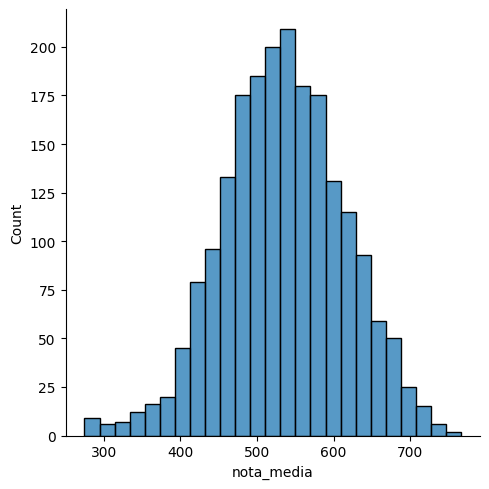

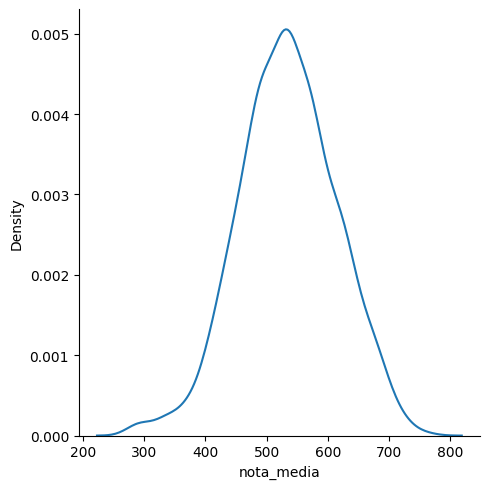

In [ ]:
sns.displot(amostra_pub['nota_media'], bins=25)
sns.displot(amostra_pub['nota_media'], kind='kde')

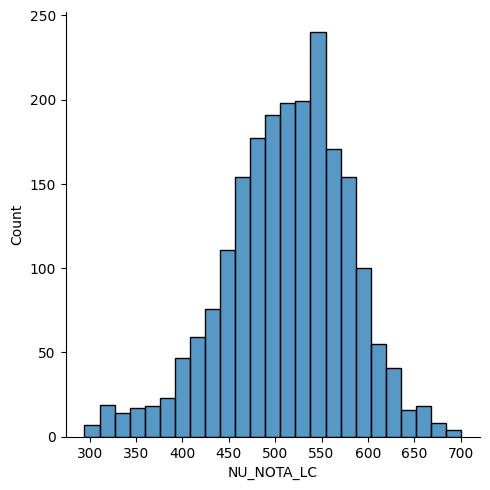

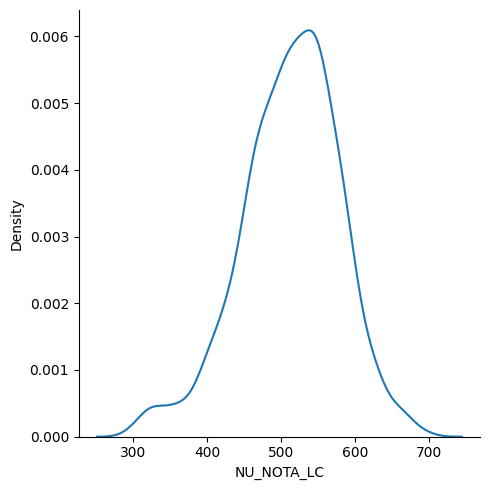

In [ ]:
sns.displot(amostra_pub['NU_NOTA_LC'], bins=25)
sns.displot(amostra_pub['NU_NOTA_LC'], kind='kde')

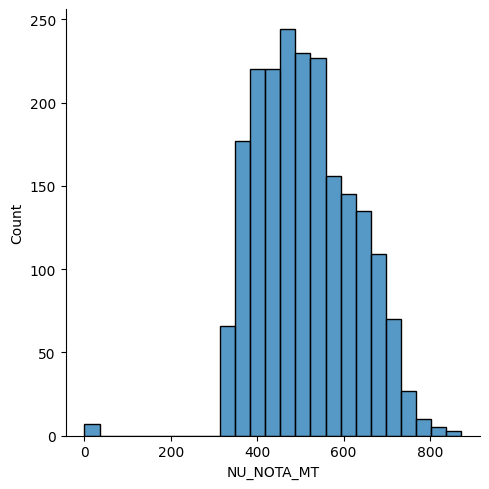

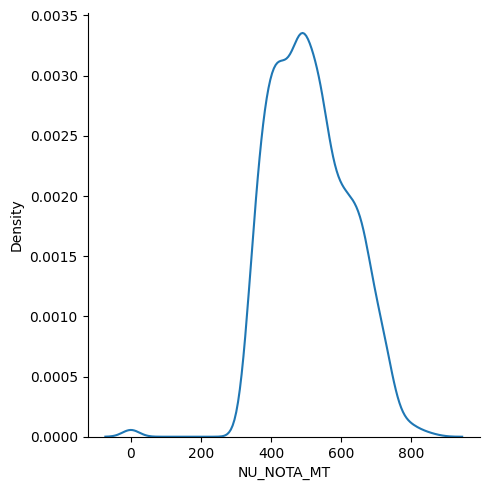

In [ ]:
sns.displot(amostra_pub['NU_NOTA_MT'], bins=25)
sns.displot(amostra_pub['NU_NOTA_MT'], kind='kde')

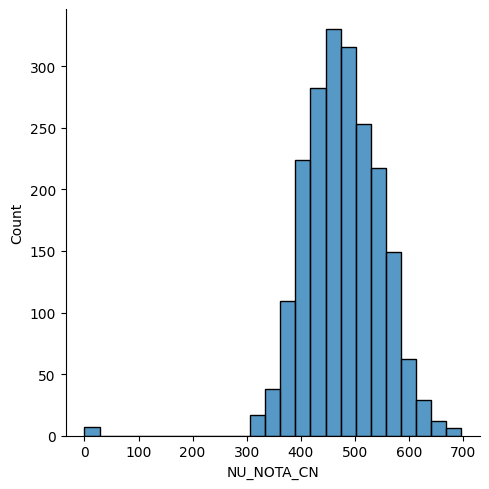

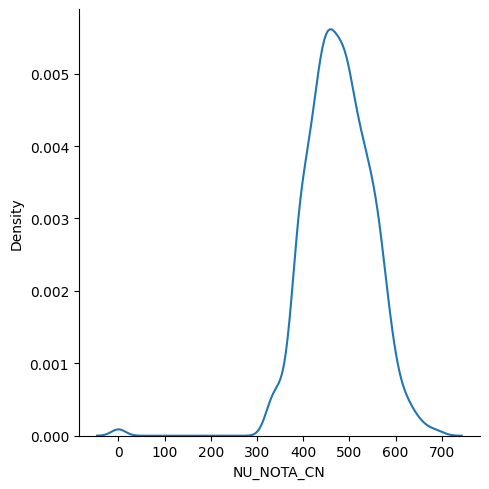

In [ ]:
sns.displot(amostra_pub['NU_NOTA_CN'], bins=25)
sns.displot(amostra_pub['NU_NOTA_CN'], kind='kde')

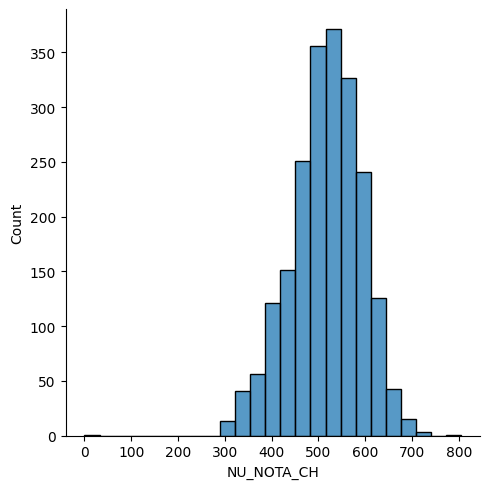

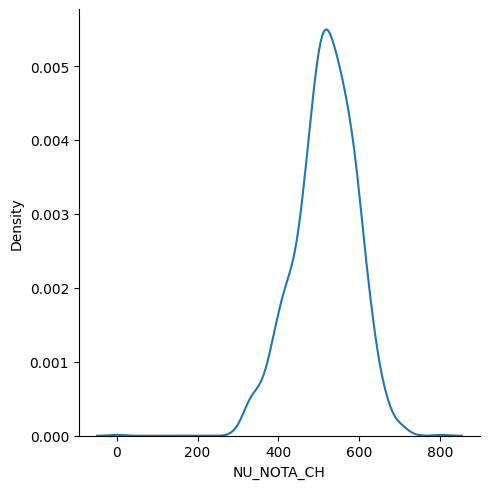

In [ ]:
sns.displot(amostra_pub['NU_NOTA_CH'], bins=25)
sns.displot(amostra_pub['NU_NOTA_CH'], kind='kde')

### Box-plots da população por tipo de escola

<ipython-input-87-88f8a371c77c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot( x="TP_ESCOLA", y='NU_NOTA_REDACAO',


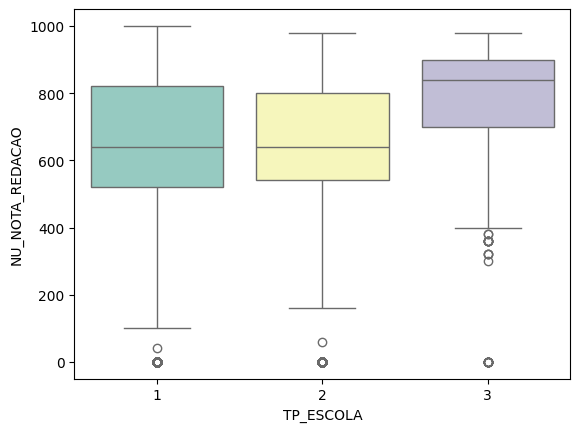

In [ ]:
 ax = sns.boxplot( x="TP_ESCOLA", y='NU_NOTA_REDACAO',
                 data=df, palette="Set3")
# pelo dicionário de microdados TP_ESCOLA = 1 não responderam, TP_ESCOLA=2 estudaram em escola pública e TP_ESCOLA=3 estudaram em escola privada

<ipython-input-88-f8beb6fee2df>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot( x="TP_ESCOLA", y='NU_NOTA_MT',


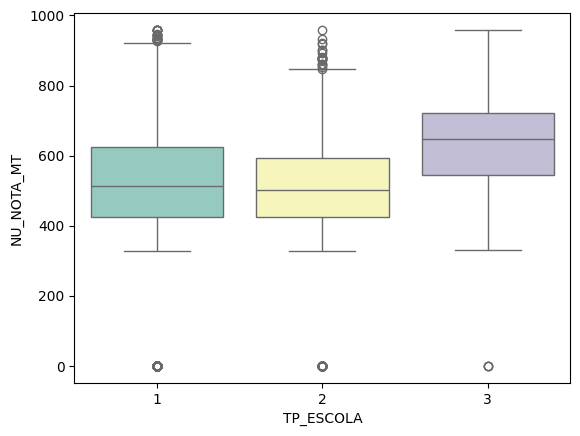

In [ ]:
 ax = sns.boxplot( x="TP_ESCOLA", y='NU_NOTA_MT',
                 data=df, palette="Set3")

<ipython-input-89-922ee66d518b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot( x="TP_ESCOLA", y='NU_NOTA_LC',


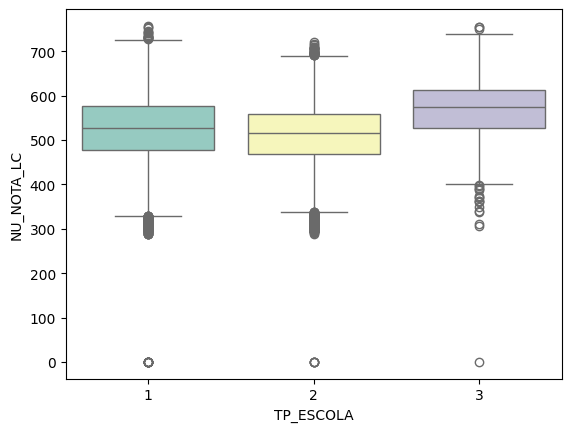

In [ ]:
 ax = sns.boxplot( x="TP_ESCOLA", y='NU_NOTA_LC',
                 data=df, palette="Set3")

<ipython-input-90-590633797958>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot( x="TP_ESCOLA", y='NU_NOTA_CN',


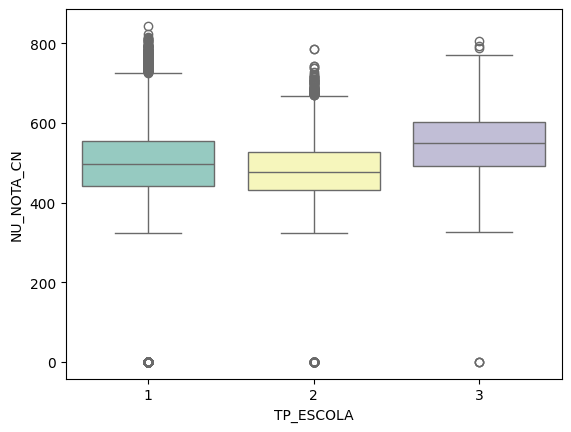

In [ ]:
 ax = sns.boxplot( x="TP_ESCOLA", y='NU_NOTA_CN',
                 data=df, palette="Set3")

<ipython-input-91-bf1a54d462ea>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot( x="TP_ESCOLA", y='NU_NOTA_CH',


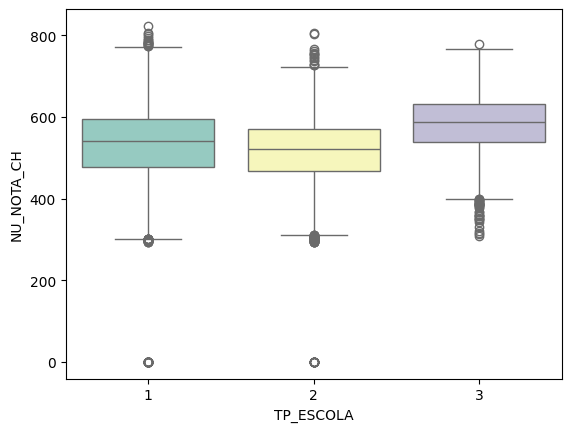

In [ ]:
 ax = sns.boxplot( x="TP_ESCOLA", y='NU_NOTA_CH',
                 data=df, palette="Set3")

# Testes de Hipóteses

Vamos testar:
Hipótese Central:
- nota média geral das escolas públicas igual a 520 vs maior que 520.

Hipóteses secundárias:
- nota média das escolas públicas na redação igual a 650 vs maior que 650.
- nota média das escolas públicas na linguagens igual a 510 vs maior que 510.
- nota média das escolas públicas na matemática igual a 500 vs maior que 500.



In [ ]:
# Testar a média geral

xbarra = np.mean(amostra_pub['nota_media']) # Indivíduos elegiveis
mu0 = 520
sigma = np.sqrt(np.var(amostra_pub['nota_media'])*len(amostra_pub) / (len(amostra_pub)-1))
n= len(amostra_pub)
f = n / len(df_pub)

xc = mu0 + norm.ppf(0.95)*(np.sqrt((1 - f))*sigma/np.sqrt(n))

print('X barra:', np.round(xbarra,2))
print('RC = {xbarra >', np.round(xc,2), '}')

X barra: 534.42
RC = {xbarra > 522.64 }


In [ ]:
# x barra

if xbarra > xc: print ('Rejeito H0')
else: print('Não rejeito H0')

Rejeito H0


In [ ]:
# Nível descritivo do teste

z_obs = (xbarra - mu0)/(np.sqrt((1 - f))*sigma/np.sqrt(n))

print(z_obs)
print('valor-p', np.round(1 - norm.cdf(z_obs),6))

8.9797681998233
valor-p 0.0


In [ ]:
# Testando a média da redação

xbarra = amostra_pub.loc[amostra_pub['TP_STATUS_REDACAO'] == 1, 'NU_NOTA_REDACAO'].mean(skipna=True) # Indivíduos elegiveis
mu0 = 650
amostra_filtrada = amostra_pub.loc[amostra_pub['TP_STATUS_REDACAO'] == 1]
sigma = np.sqrt(np.var(amostra_filtrada['NU_NOTA_REDACAO'])*len(amostra_filtrada) / (len(amostra_filtrada)-1))
n= len(amostra_filtrada)
f = n / len(df_pub)

xc = mu0 + norm.ppf(0.95)*(np.sqrt((1 - f))*sigma/np.sqrt(n))

print('X barra:', np.round(xbarra,2))
print('RC = {xbarra >', np.round(xc,2), '}')

X barra: 661.74
RC = {xbarra > 655.54 }


In [ ]:
# x barra

if xbarra > xc: print ('Rejeito H0')
else: print('Não rejeito H0')

Rejeito H0


In [ ]:
# Nível descritivo do teste

z_obs = (xbarra - mu0)/(np.sqrt((1 - f))*sigma/np.sqrt(n))

print(z_obs)
print('valor-p', np.round(1 - norm.cdf(z_obs),6))

3.482406906643424
valor-p 0.000248


In [ ]:
# Testar a média em linguagens

xbarra = np.mean(amostra_pub['NU_NOTA_LC']) # Indivíduos elegiveis
mu0 = 510
sigma = np.sqrt(np.var(amostra_pub['NU_NOTA_LC'])*len(amostra_pub) / (len(amostra_pub)-1))
n= len(amostra_pub)
f = n / len(df_pub)

xc = mu0 + norm.ppf(0.95)*(sigma*np.sqrt((1 - f))/np.sqrt(n))

print('X barra:', np.round(xbarra,2))
print('RC = {xbarra >', np.round(xc,2), '}')

X barra: 512.39
RC = {xbarra > 512.22 }


In [ ]:
# x barra

if xbarra > xc: print ('Rejeito H0')
else: print('Não rejeito H0')

Rejeito H0


In [ ]:
# Nível descritivo do teste

z_obs = (xbarra - mu0)/(np.sqrt((1 - f))*sigma/np.sqrt(n))

print(z_obs)
print('valor-p', np.round(1 - norm.cdf(z_obs),6))

1.7709293246892786
valor-p 0.038286


In [ ]:
# Testar a média em matemática

xbarra = np.mean(amostra_pub['NU_NOTA_MT']) # Indivíduos elegiveis
mu0 = 500
sigma = np.sqrt(np.var(amostra_pub['NU_NOTA_MT'])*len(amostra_pub) / (len(amostra_pub)-1))
n= len(amostra_pub)
f = n / len(df_pub)

xc = mu0 + norm.ppf(0.95)*(sigma*np.sqrt((1 - f))/np.sqrt(n))

print('X barra:', np.round(xbarra,2))
print('RC = {xbarra >', np.round(xc,2), '}')

X barra: 511.83
RC = {xbarra > 503.71 }


In [ ]:
# x barra

if xbarra > xc: print ('Rejeito H0')
else: print('Não rejeito H0')

Rejeito H0


In [ ]:
# Nível descritivo do teste

z_obs = (xbarra - mu0)/(np.sqrt((1 - f))*sigma/np.sqrt(n))

print(z_obs)
print('valor-p', np.round(1 - norm.cdf(z_obs),6))

5.248696646946566
valor-p 0.0


In [ ]:
# como temos os dados da população, vamos verificar se mu está proximo de xbarra
# e conferir se esse plano amostral teve um bom desempenho

mu_media_geral = np.mean(df_pub['nota_media'])
# X barra media geral: 526.14


mu_redacao = df.loc[df_pub['TP_STATUS_REDACAO'] == 1, 'NU_NOTA_REDACAO'].mean(skipna=True)

mu_linguagens = np.mean(df_pub['NU_NOTA_LC'])
#X barra para linguagens: 508.83

mu_matematica = np.mean(df_pub['NU_NOTA_MT'])
#X barra para matematica: 506.92